# P53 - DMS Analysis
#### by Frido Petersen, Dario Prifti, Maximilian Fidlin and Enno Schäfer

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import data_exploration as de
import visualization as vis
import data_cleanup as dc
import Documentation as doc
import severity_score as ses

In [18]:
# These are all the datasets we used
gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
gia_null_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Nutlin_2018.csv')
gia_wt_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv')
kot_hum: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Kotler_2018.csv')

aa = pd.read_csv('../DMS_data/aminoacids.csv')

## Comparibility of p53 Datasets
#### Finding similarities and differences in the 4 datasets on p53

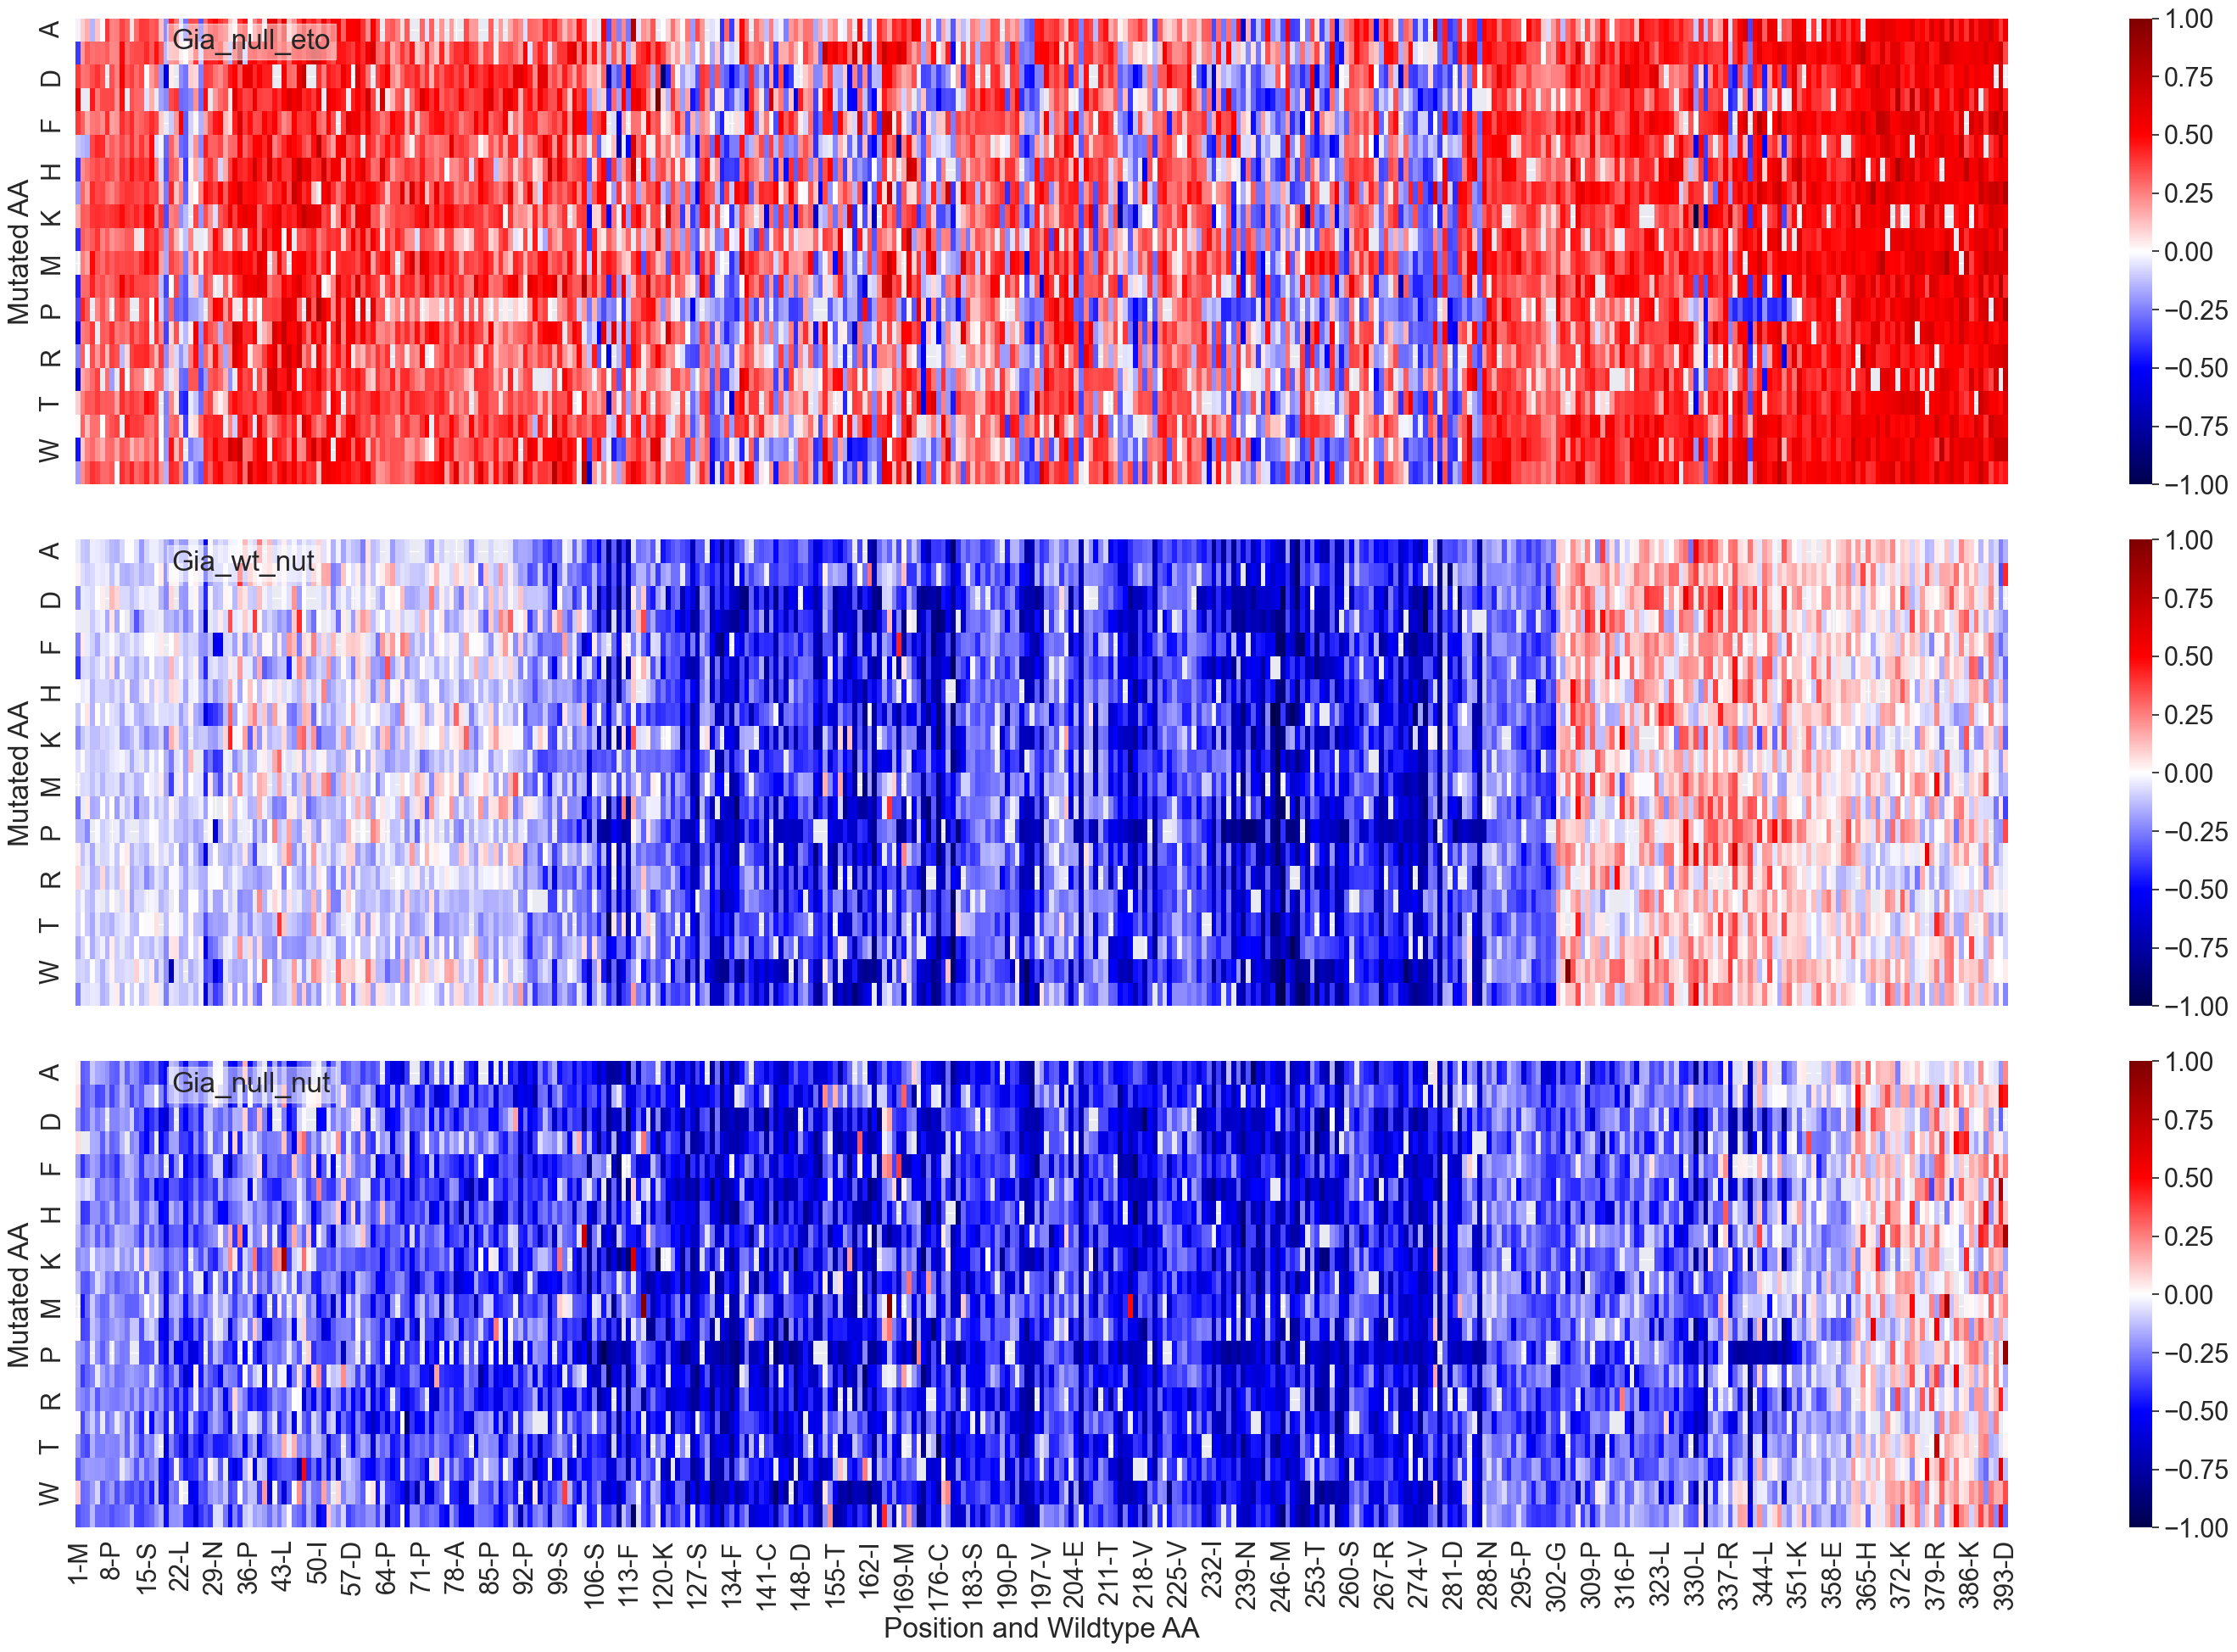

In [19]:
# Giacomelli Null Etoposide, Giacomelli Wildtype Nutlin, Giacomelli Null Nutlin
vis.mult_hmap(doc.gia_null_eto_norm, doc.gia_wt_nut_norm, doc.gia_null_nut_norm)

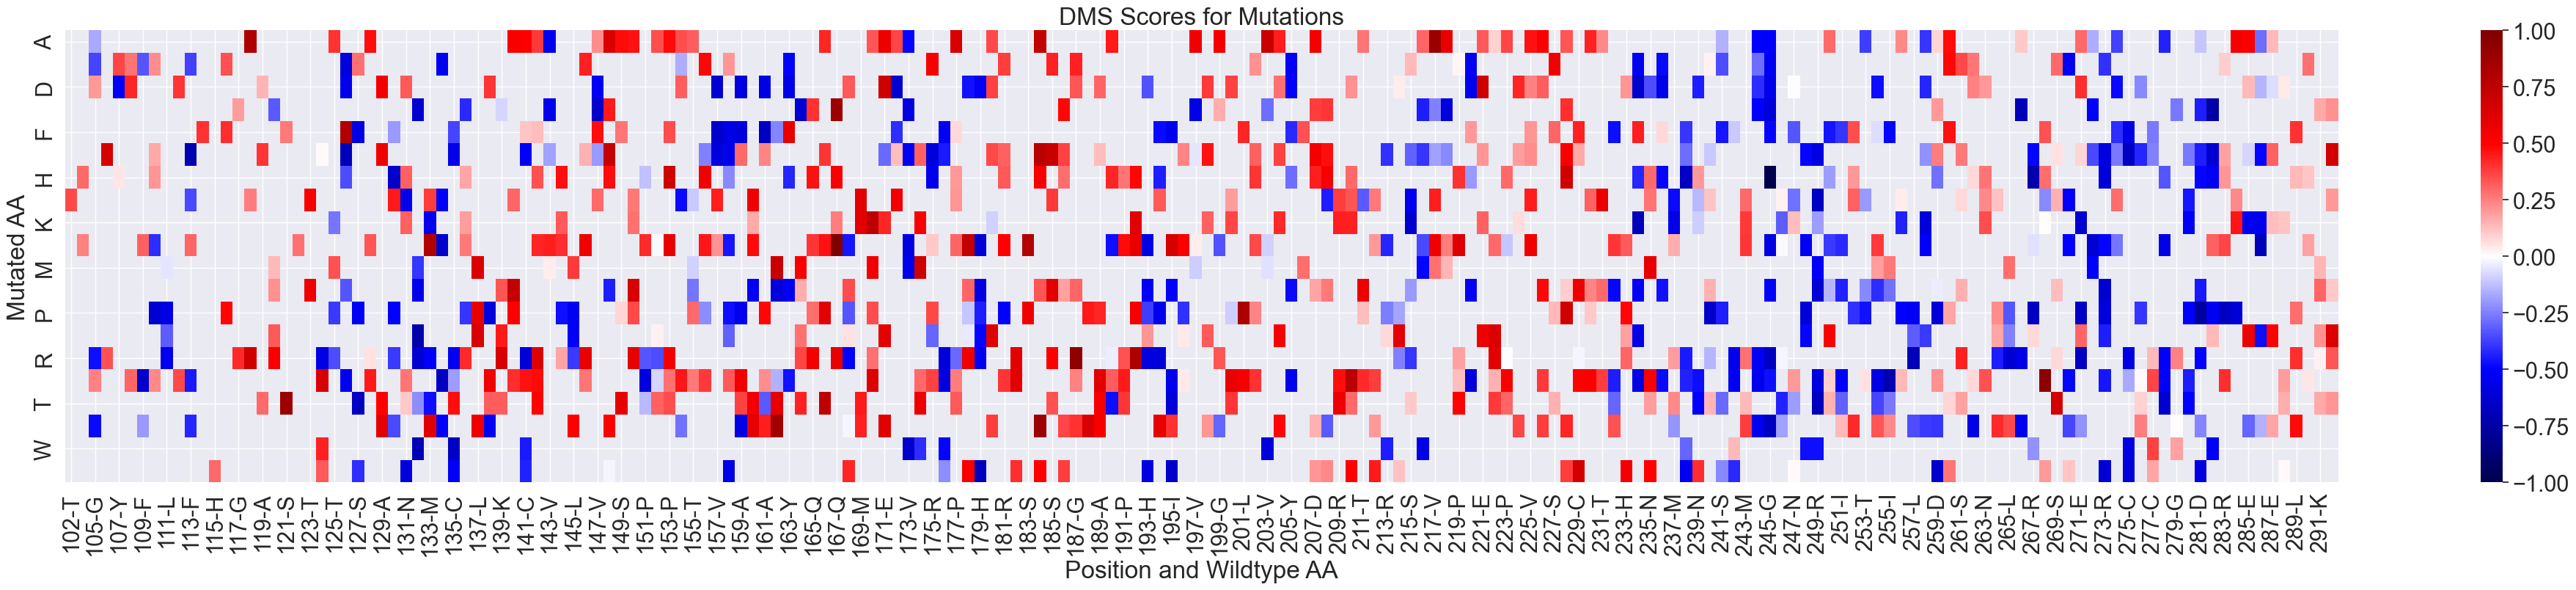

In [20]:
# Kotler
vis.hmap(doc.kot_hum_norm_amp)

In [21]:
# The aminoacids in the original sequence that, when replaced, caused the most negative DMS scores throughout the whole Protein.
de.calculate_average_dms_score_old(('GNE', doc.gia_null_eto_norm_amp), ('GNN', doc.gia_null_nut_norm_amp), ('GWN', doc.gia_wt_nut_norm_amp), ('KH', doc.kot_hum_norm_amp))

,GNE,GNN,GWN,KH
AS_old,,,,
A,0.297155,-0.341339,-0.132955,0.099555
C,-0.051440,-0.545096,-0.543561,-0.145375
D,0.294087,-0.293424,-0.160131,0.170728
E,0.304599,-0.295454,-0.177860,0.100811
F,0.053043,-0.445465,-0.215654,-0.250488
G,0.260013,-0.327492,-0.204543,-0.070218
H,0.224304,-0.311369,-0.315392,-0.063656
I,-0.067487,-0.558694,-0.405441,-0.146787
K,0.353891,-0.226912,-0.066513,0.089816


In [22]:
#the amino acids that, when mutated to, resulted in the most significant decreases in the DMS score, indicating a substantial impact on protein function.
de.calculate_average_dms_score_new(('GNE', doc.gia_null_eto_norm_amp), ('GNN', doc.gia_null_nut_norm_amp), ('GWN', doc.gia_wt_nut_norm_amp), ('KH', doc.kot_hum_norm_amp))

,GNE,GNN,GWN,KH
AS_new,,,,
A,0.230294,-0.366054,-0.215091,0.263278
C,0.306080,-0.298968,-0.162306,0.001974
D,0.177935,-0.380285,-0.229204,-0.050507
E,0.189927,-0.351673,-0.234932,-0.168010
F,0.265481,-0.330305,-0.208782,-0.066033
G,0.188055,-0.378543,-0.229989,-0.028291
H,0.237960,-0.358202,-0.210794,0.053206
I,0.284615,-0.312255,-0.214637,0.094158
K,0.212806,-0.339281,-0.220014,0.043194


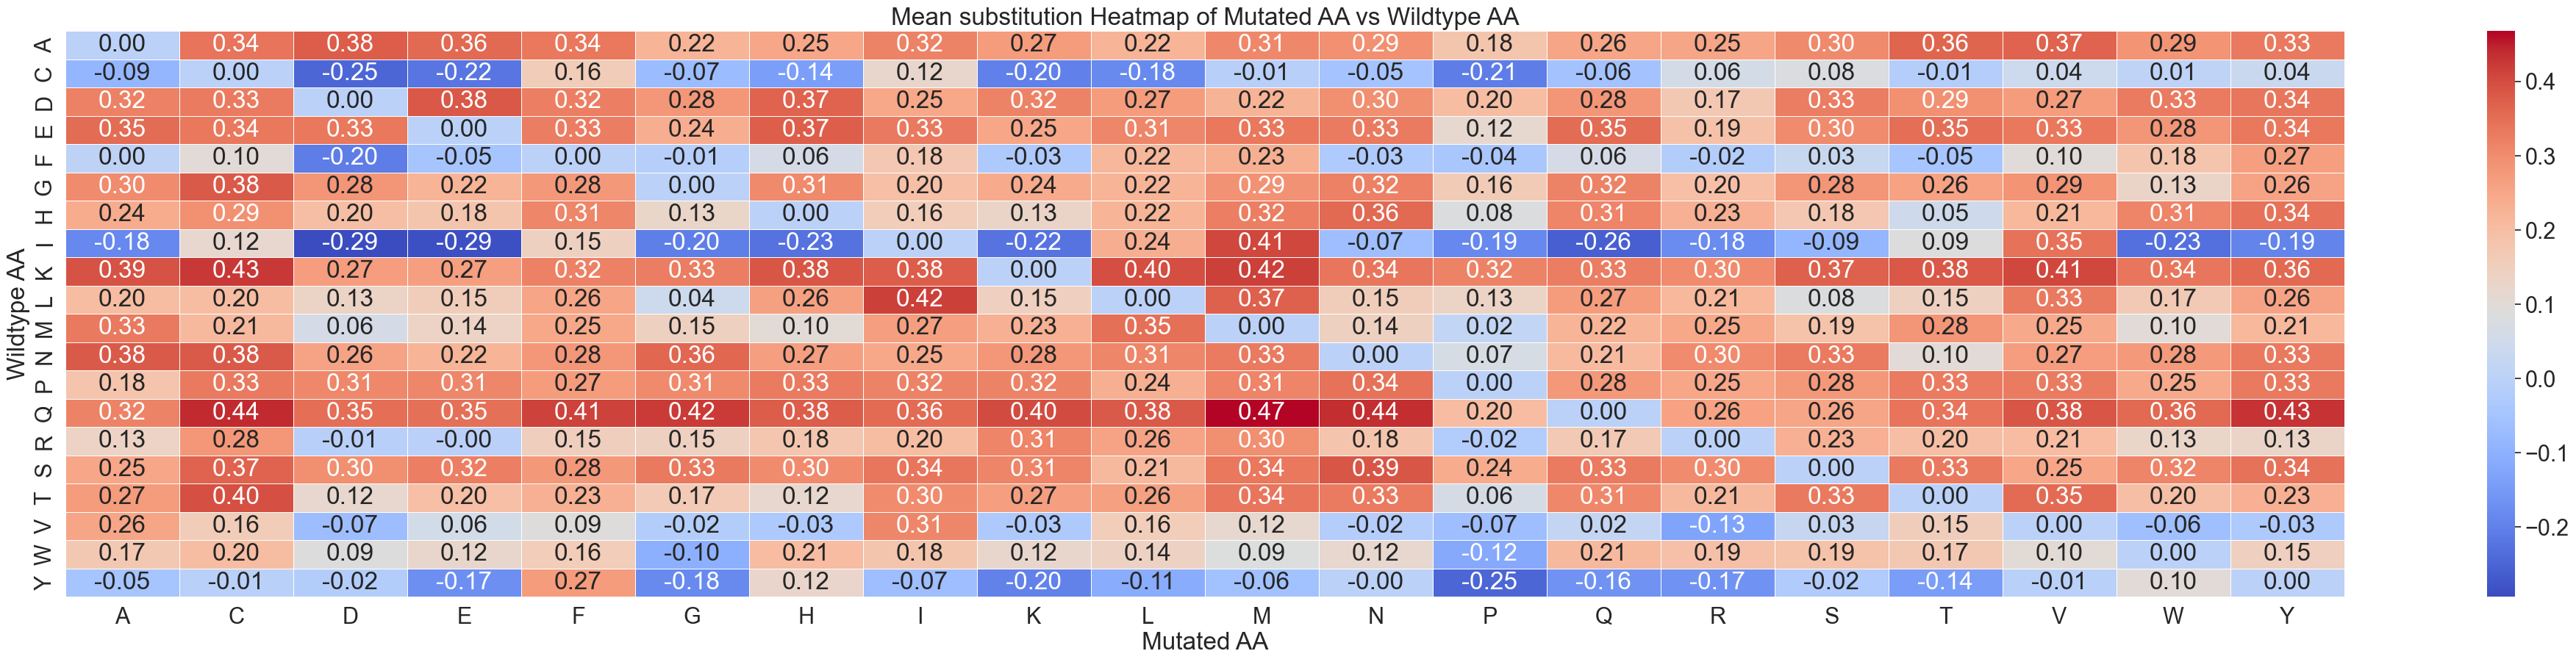

In [23]:
#In order to make these comparisons a little clearer we used a heatmap to illustrate these trends of substitution. The x-axis shows us the DMS scores of the AA's when replaced and the y-axis the DMS-scores of the AA's when replaced with.
vis.hmap_mean_variance(doc.mean_substitutionsGNE)

In [24]:
# The 5 position with the lowest mean DMS_scores in the "Giacomelli null etoposide" dataset
doc.GNELV

,,Sum
position_mut,AS_old,
280,R,-6.190289
281,D,-6.189019
278,P,-5.751278
205,Y,-5.682232
275,C,-5.511703


In [25]:
# The 5 position with the highest mean DMS_scores in the "Giacomelli null etoposide" dataset
doc.GNEHV

,,Sum
position_mut,AS_old,
392,S,11.438619
388,E,11.416638
393,D,11.382284
391,D,11.195635
374,G,11.153968


In [26]:
# The positions (-> most affected by mutation) are the following throughout each Dataset:
doc.lowest_vals.head(20)

,Name of the Dataset,Location of lowest DMS_score sum,Sum,Original AA
0,Giacomelli Null Etoposide,280,-6.190289,R
1,Giacomelli NULL Nutlin,205,-13.762829,Y
2,Giacomelli WT Nutlin,245,-15.419176,G
3,Kotler,245,-6.568038,G


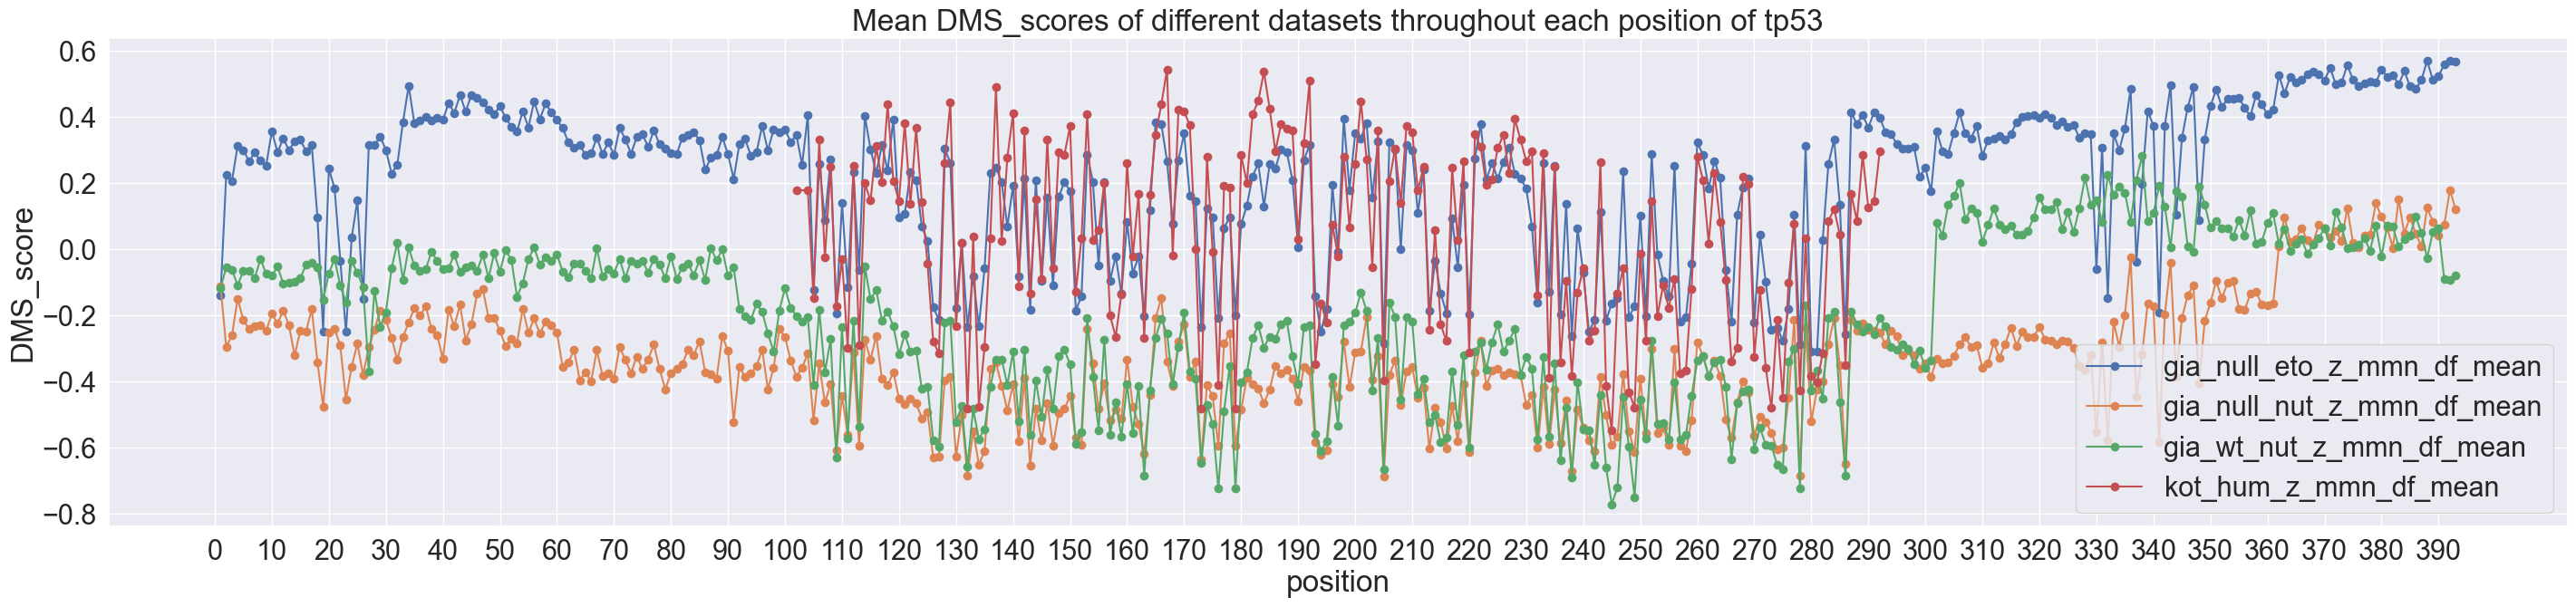

In [27]:
#As a final and conclusive way to show the differences of the datasets we chose to visualize our datasets as linegraphs in one plot, this plot shows the mean DMS scores for each position and lets us quickly seek out positions that are greatly affected by mutation and those that are not. By summing up all DMS scores and dividing this sum by the number of values summed we can also create a rough comparability to the Kotler dataset which is also visible in this graph:
vis.linegraph(dataframes=[doc.gia_null_eto_z_mmn_df_mean, doc.gia_null_nut_z_mmn_df_mean, doc.gia_wt_nut_z_mmn_df_mean, doc.kot_hum_z_mmn_df_mean])

## Data cleanup
#### Preparing the data to enable further anaylses

Z-transfromation and Min Max normalisation of df


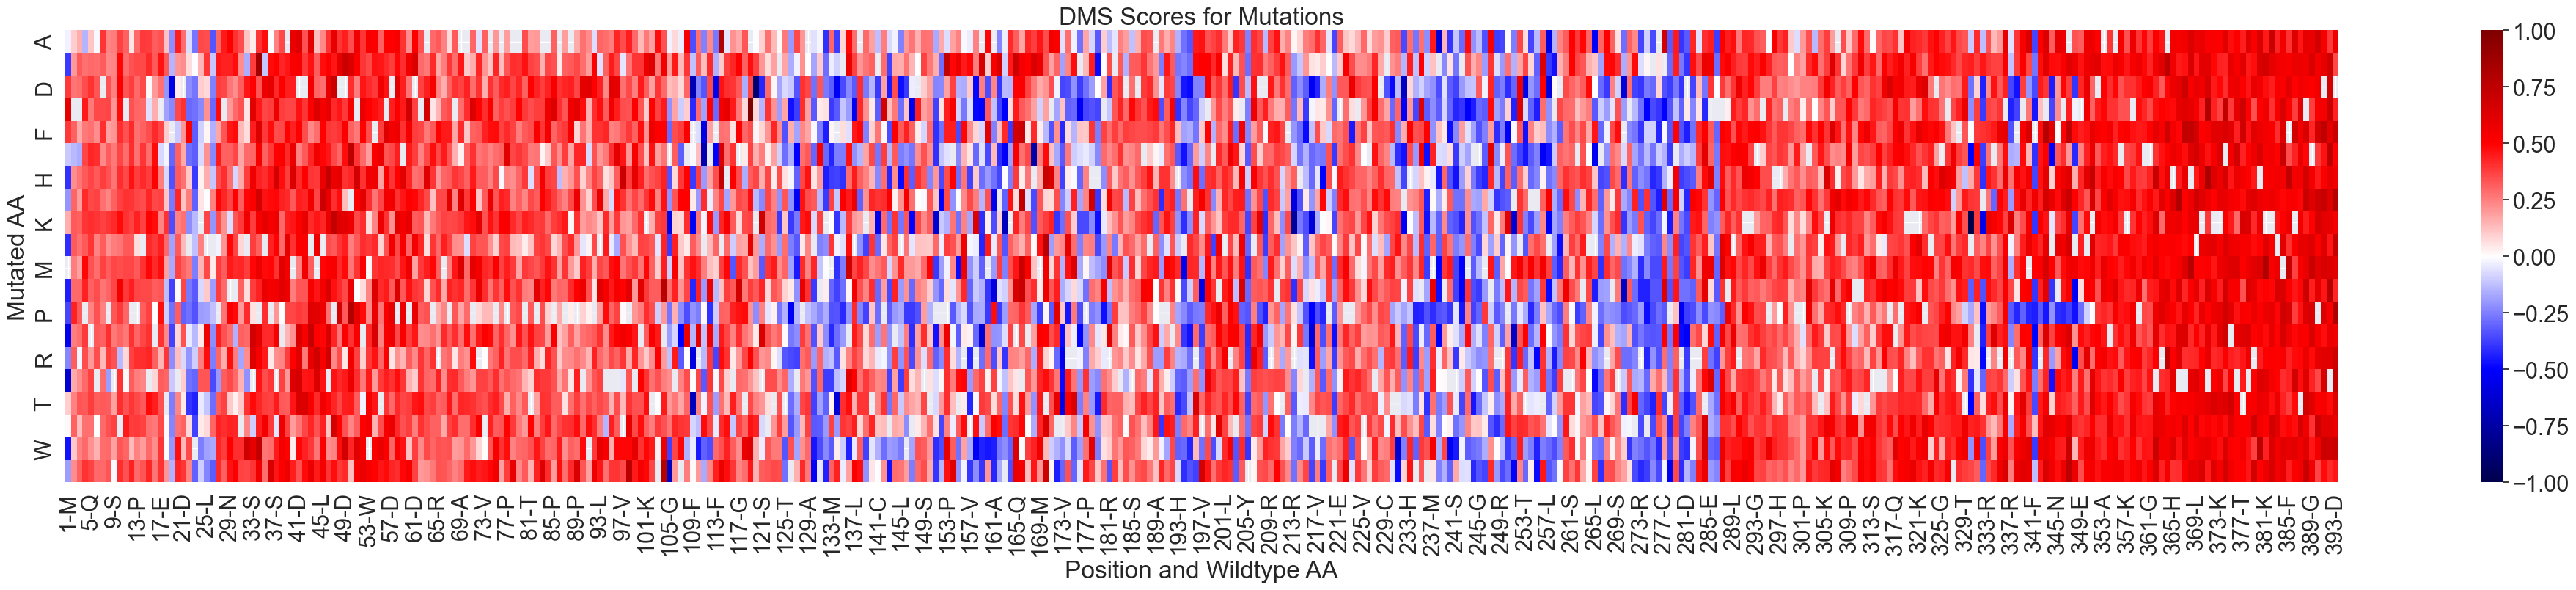

Position of Low and High values of frame


{'min': 6257, 'max': 2252}

In [28]:
# min max Normalisierung
norm_frame = dc.aufteilung_mut_pos(dc.norm(gia_null_eto))
print("Z-transfromation and Min Max normalisation of df")
vis.hmap(norm_frame)
print(f"Position of Low and High values of frame")
dc.min_max_val(norm_frame)

## Data exploration
#### First, we calculated the distance and mean substitution matrices. With these DataFrames, we performed PCA, clustering and plotted the results. To understand the code and see additional plots, take a look at the "data_exploration" python package.

In [29]:
# calculate feature matrices
feature_matrix_aa = dc.clean_aa(aa)
feature_matrix_p53 = dc.rmv_na(dc.df_transform(norm_frame))

In [30]:
# calculate distance matrices as well as mean substitution matrices
dist_chem = de.aa_distance_matrix(aa)

dist_wt_p53 = de.dms_distance_matrix_wt(norm_frame)
dist_mut_p53 = de.dms_distance_matrix_mutated(norm_frame)

mean_subs_wt_p53 = dc.rmv_na(de.mean_substitutions(norm_frame))
mean_subs_mut_p53 = dc.rmv_na(de.mean_substitutions(norm_frame).T)

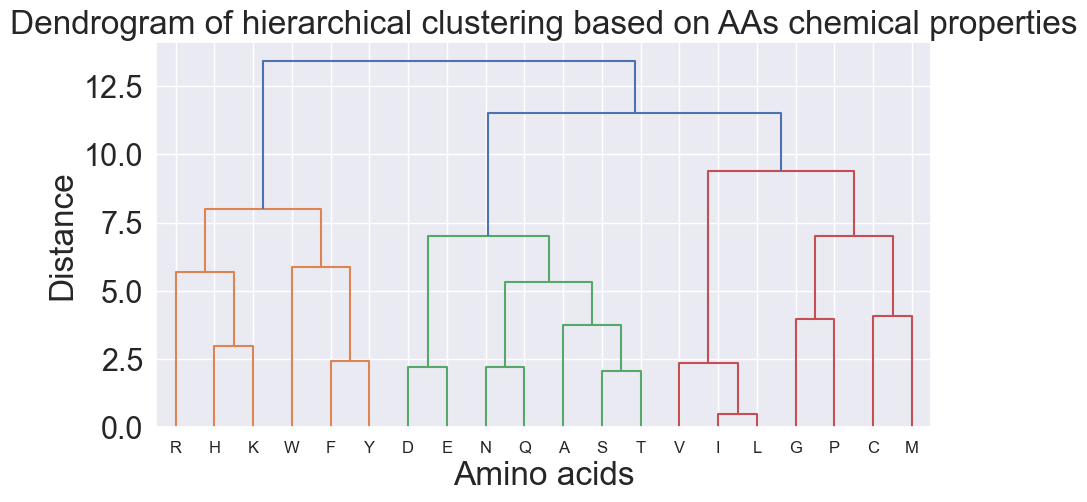

---------------------------------


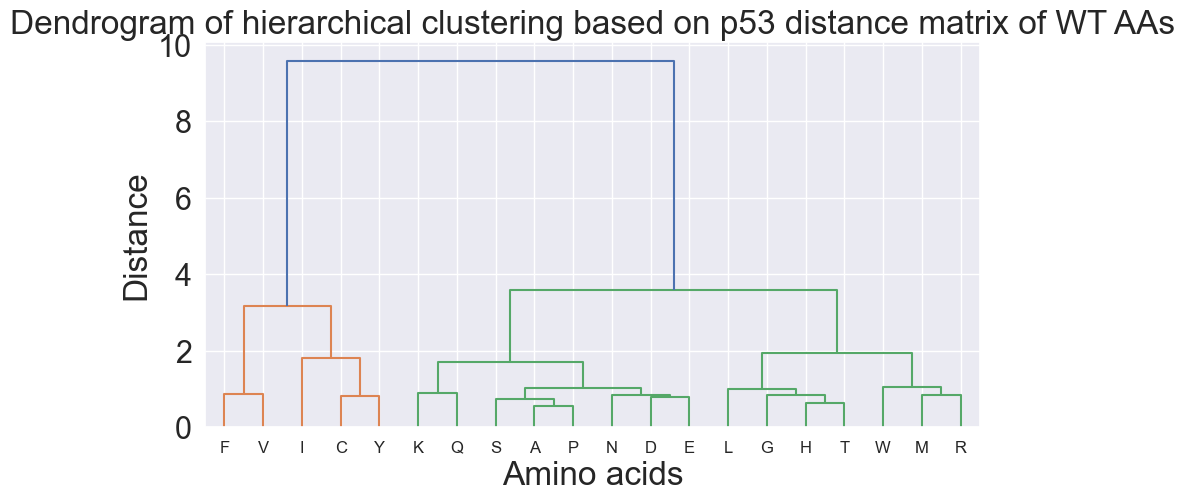

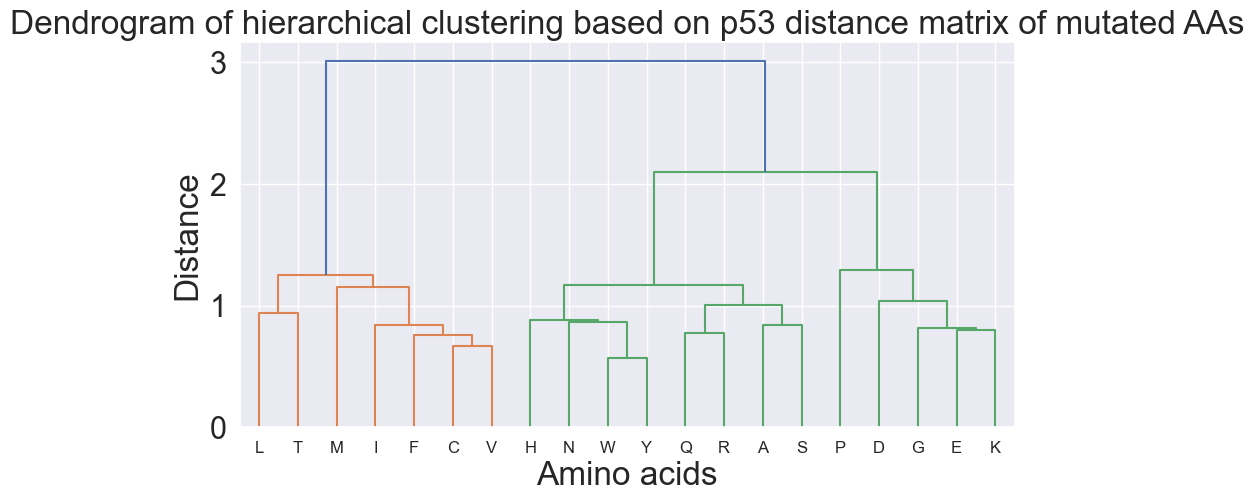

---------------------------------


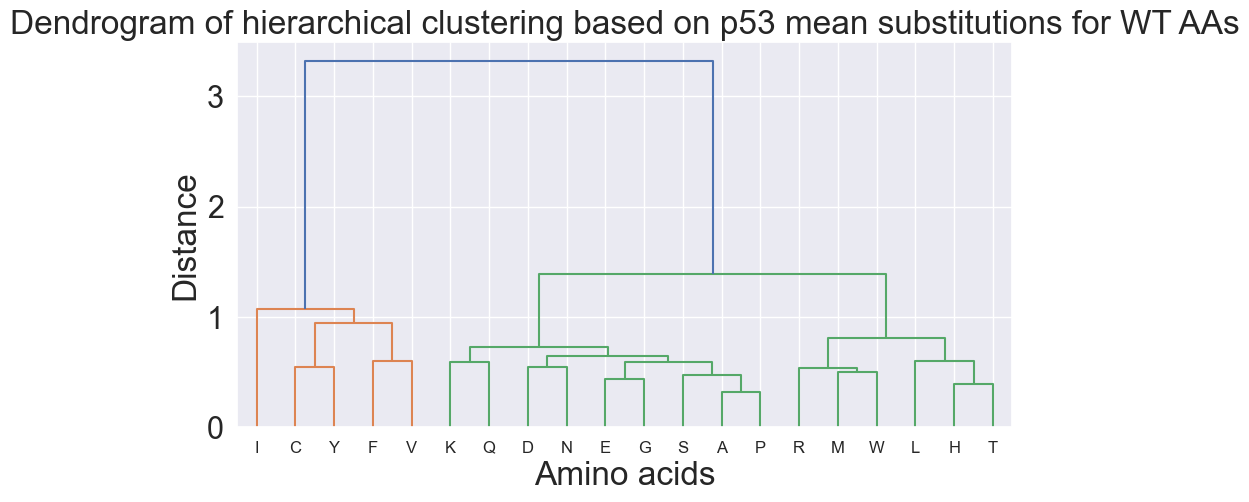

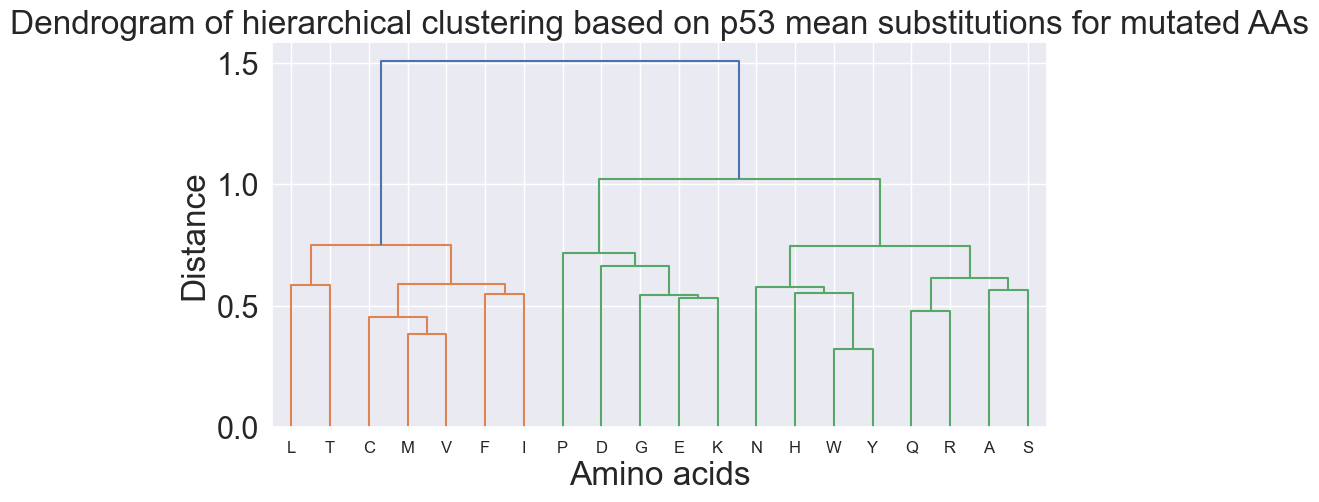

In [31]:
# hierarchical ward clustering
de.plot_hier_clust(dist_chem, title = "AAs chemical properties")
print("---------------------------------")
de.plot_hier_clust(dist_wt_p53, title = "p53 distance matrix of WT AAs")
de.plot_hier_clust(dist_mut_p53, title = "p53 distance matrix of mutated AAs")
print("---------------------------------")
de.plot_hier_clust(mean_subs_wt_p53, title = "p53 mean substitutions for WT AAs")
de.plot_hier_clust(mean_subs_mut_p53, title = "p53 mean substitutions for mutated AAs")

In [32]:
# determine optimal amount of clusters
clusters_by_sil_chem = de.determine_clusters_silhouette(feature_matrix_aa)

clusters_by_sil_p53 = de.determine_clusters_silhouette(feature_matrix_p53)


print (clusters_by_sil_chem)
print ("---")
print (clusters_by_sil_p53)

4
---
6


Explained variance for PCA of AAs clustered by chemical properties:
PC1: 0.36
PC2: 0.23


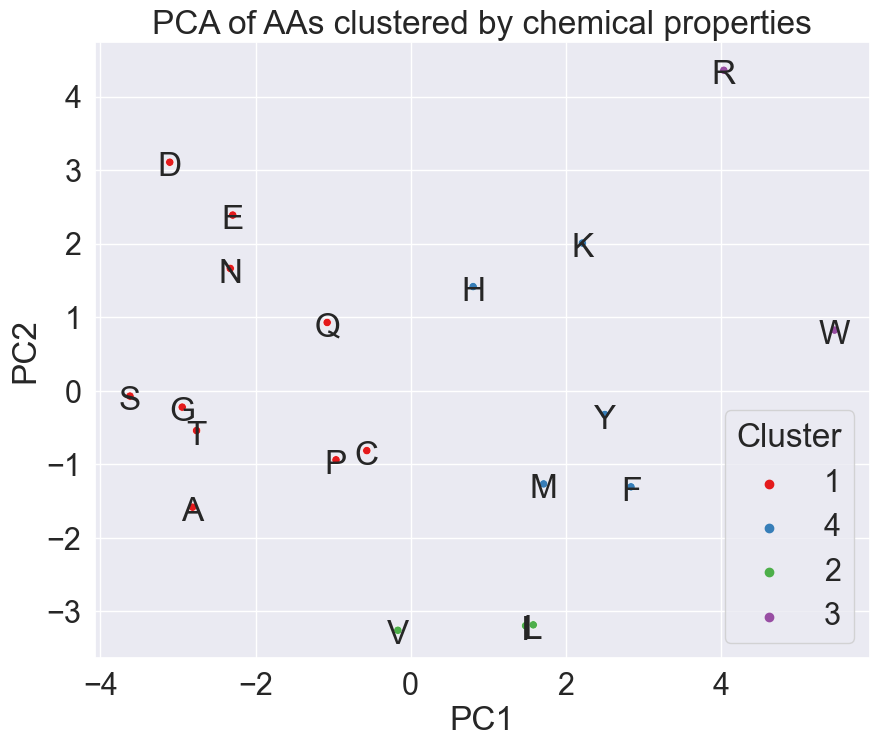

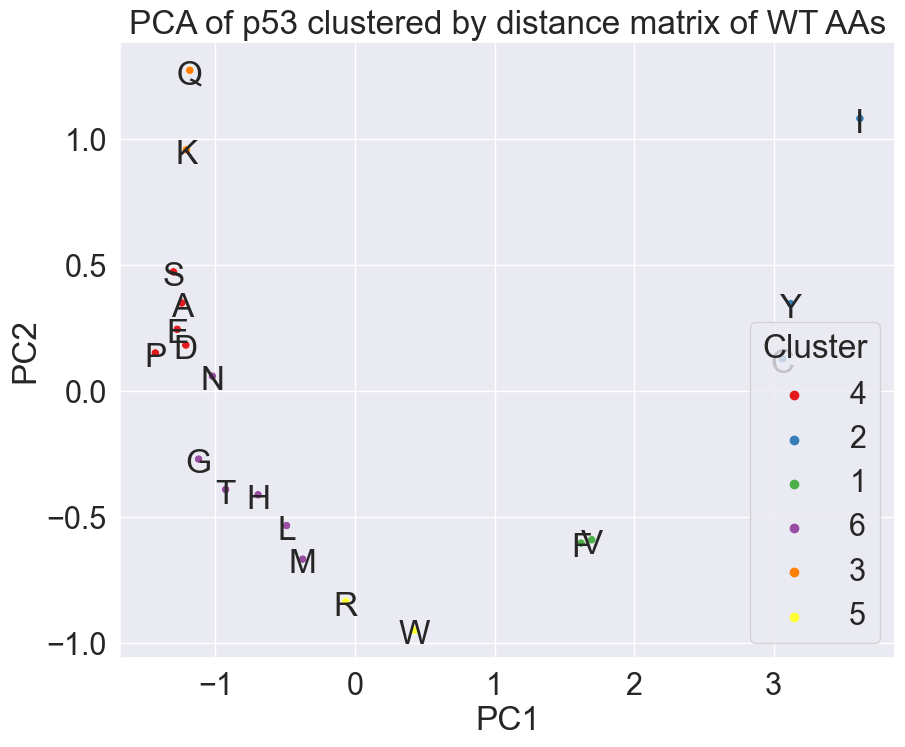

Explained variance for PCA of p53 clustered by distance matrix of mutated AAs:
PC1: 0.43
PC2: 0.16


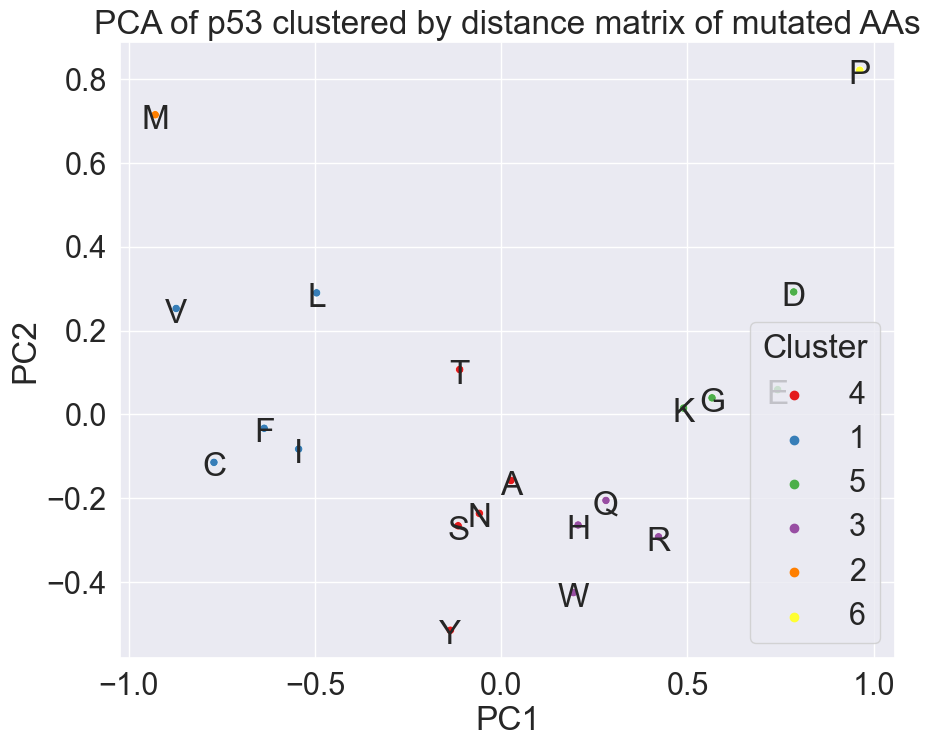

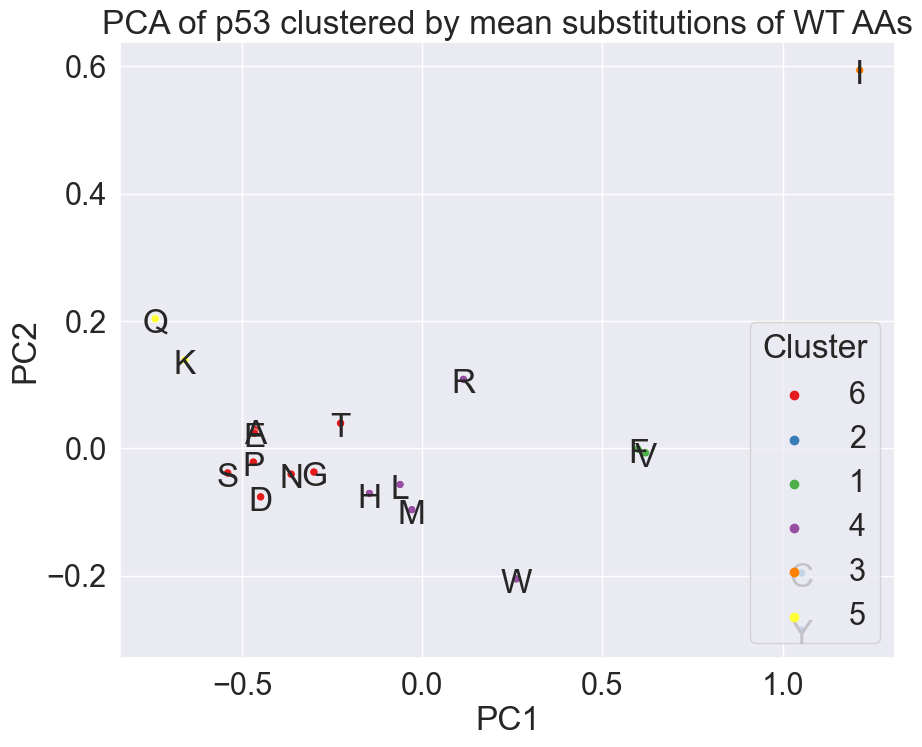

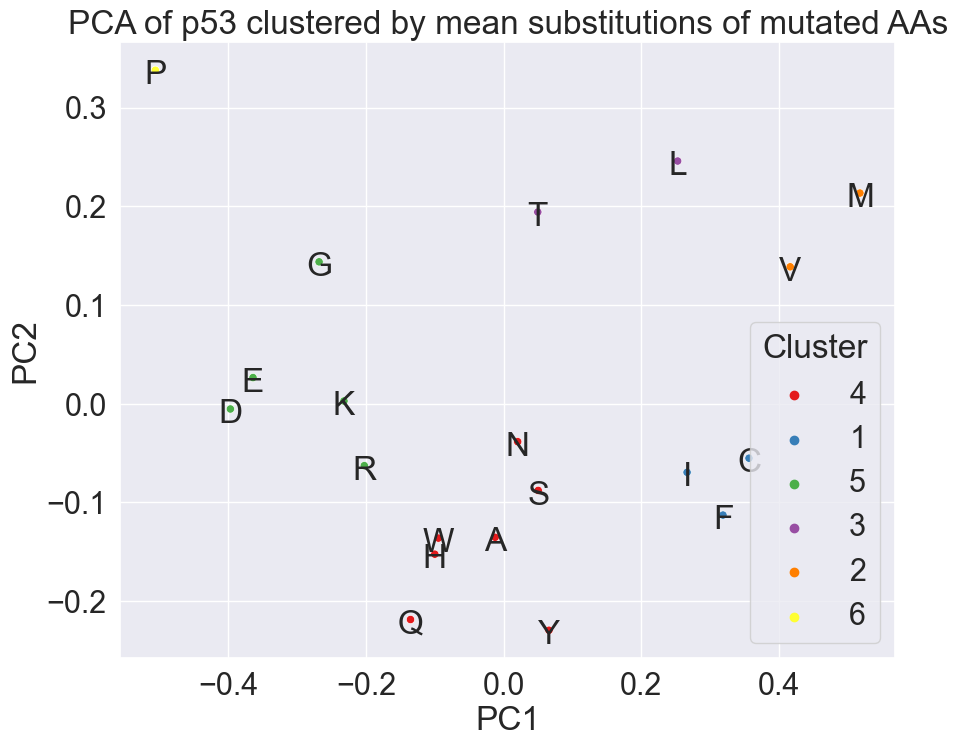

In [33]:
# Plotting, after pca and hierarchical clustering. clusters are defined by the colors shown in the legend.
de.pca_hierarchical_plot(dist_chem, optimal_num_cluster= clusters_by_sil_chem, title = "AAs clustered by chemical properties", show_var=True)

de.pca_hierarchical_plot(dist_wt_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by distance matrix of WT AAs")
de.pca_hierarchical_plot(dist_mut_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by distance matrix of mutated AAs", show_var=True)

de.pca_hierarchical_plot(mean_subs_wt_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by mean substitutions of WT AAs")
de.pca_hierarchical_plot(mean_subs_mut_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by mean substitutions of mutated AAs")

#------------------------------------------------------------------
# I HAVE NO IDEA WHY THESE PLOTS LOOK SO AWFUL IN THIS NOTEBOOK. For better plots look at the de.clustering_pca_plotting.ipynb file

##### *Outlook and additional information for Data Exploration*

TO MAKE THESE PLOTS FOR EACH DOMAIN: Take a look at the de.pca_hierarchical_plotting_domains.ipynb file

TO SEE THE PLOTS WITH K-MEANS: To quantify the effects of the clustering method used (here: hierarchical clustering), we also performed clustering with kmeans to compare the results in the report. Take a look at the de.pca_kmeans_plotting.ipynb file

TO PROOF OUR CODE RUNS ON ALL DATASETS: We ran our code on the Stiffler Dataset on E. coli ß-Lactamase. To see the plots, take a look at the pca_hierarchical_plotting_ßlactamase.ipynb file

## Domain comparison
#### Comparing Clusterings of substitutions in the context of specific protein domains

For the comparison of the domains we first cut our data into smaller corresponding chunks. We then applied different types of analyses on those domains, all of which can be seen in the domain_comparison folder. We then repeated those steps with only the aminoacids reachable with a single base mutation (SMU) and with amino acids belonging to random codons. We then compared the complete dataset to the SMU dataset domain-wise. Also, the random mutations where compared to the SMU.

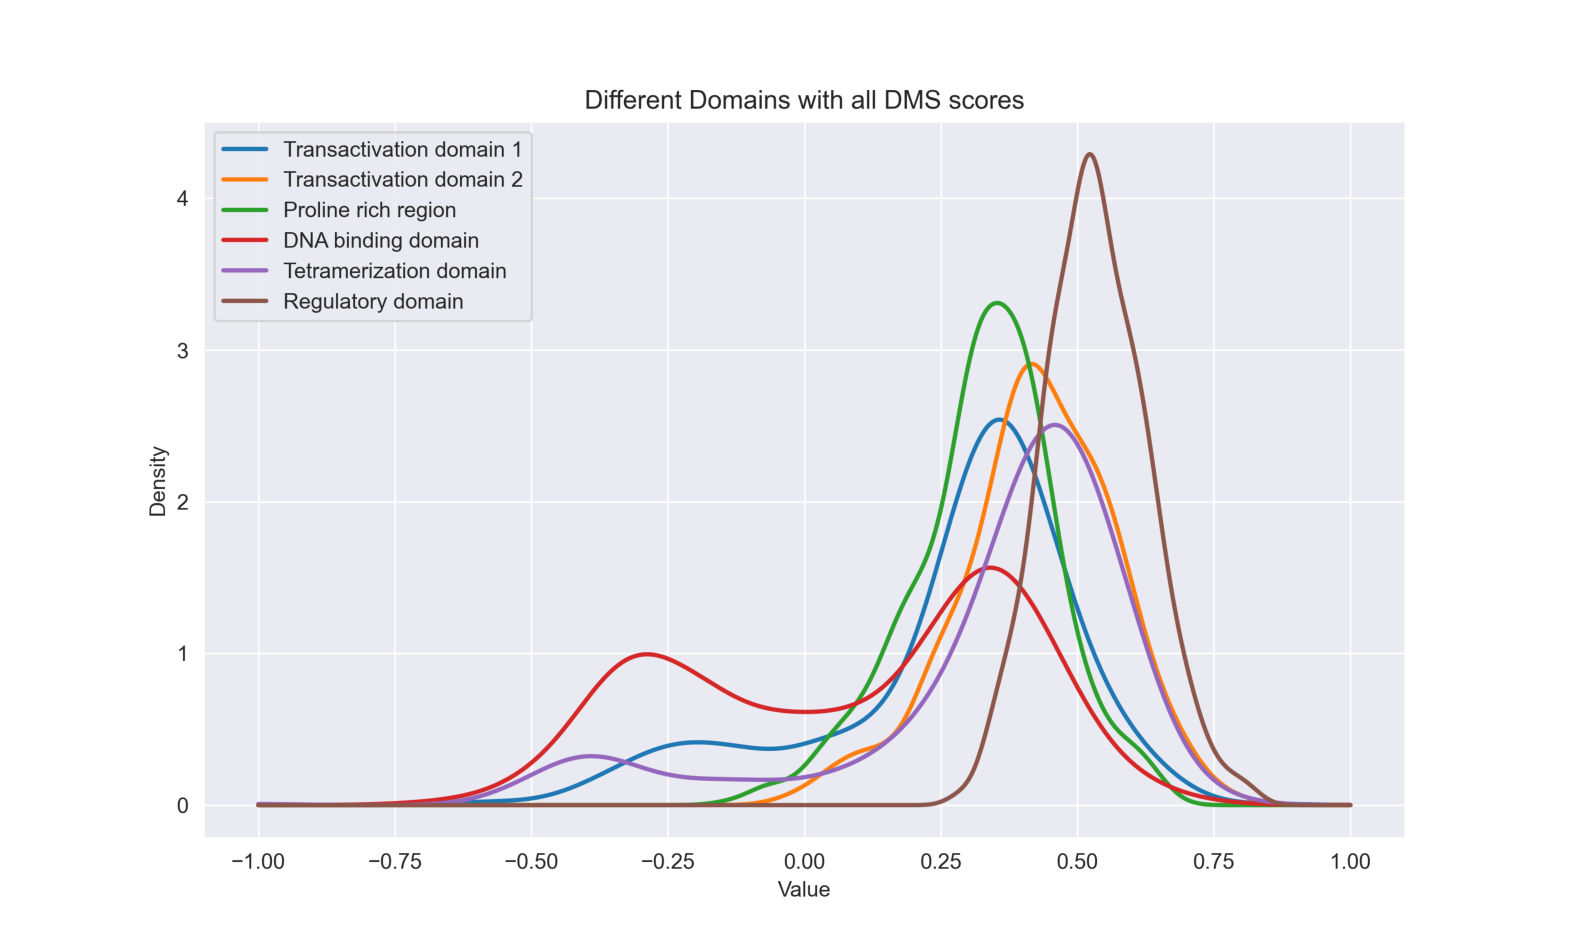

In [34]:
# All DMS scores divided onto the different domains
all_dms = plt.imread('../domain_comparison/data/all_dms.png')

fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(all_dms)
plt.axis('off')
plt.show()

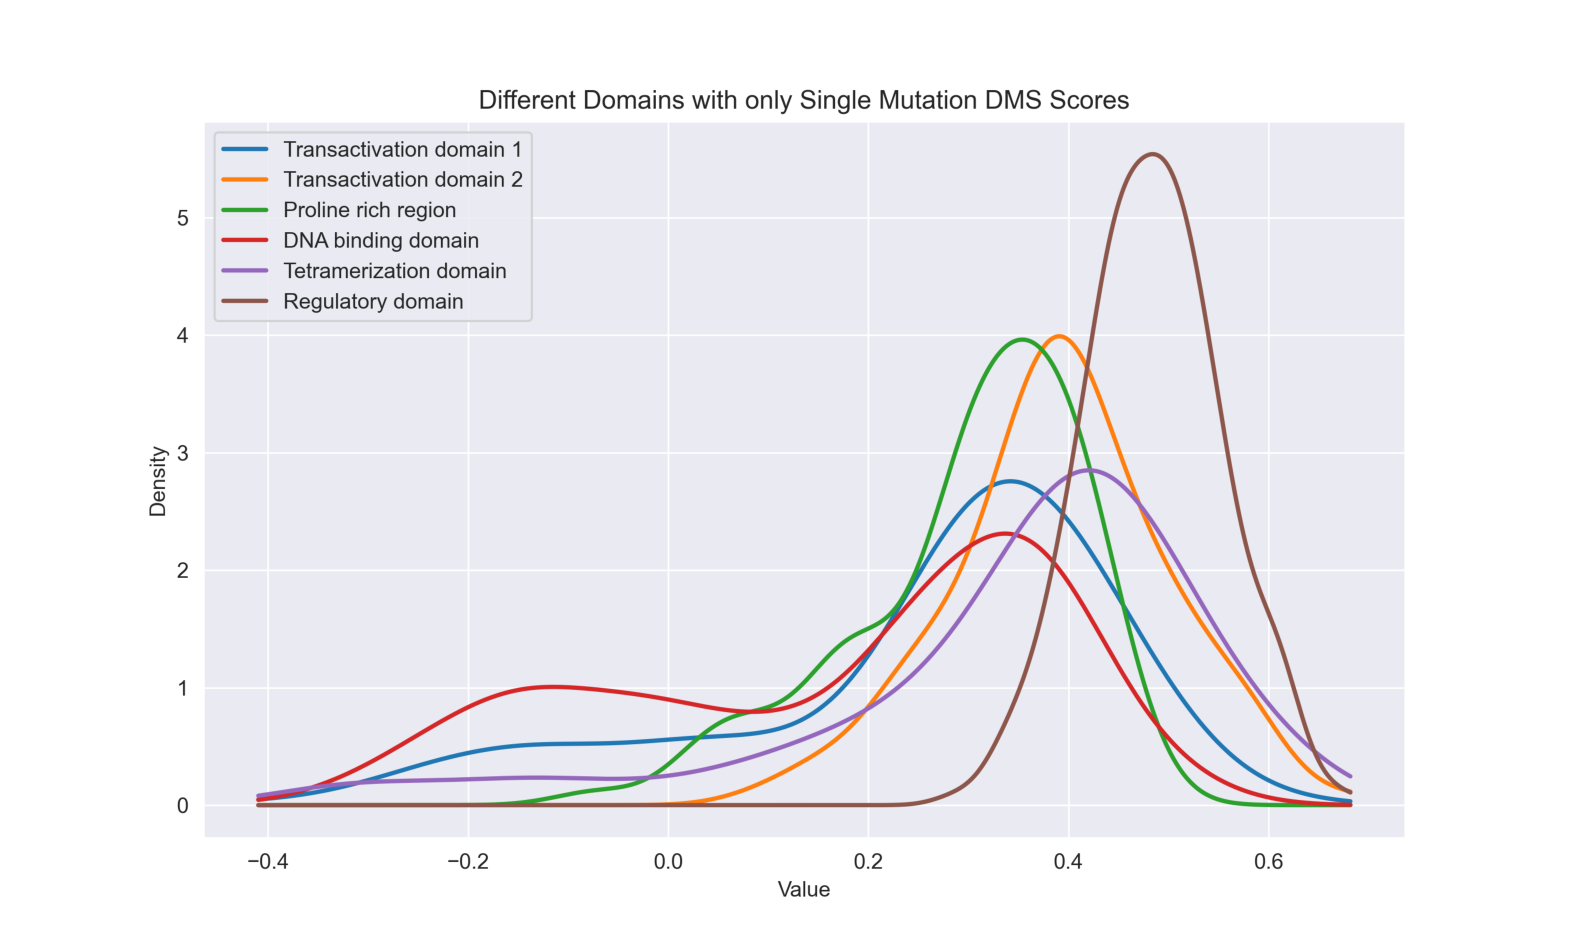

In [35]:
#Sinlge mutations only
smu_dms = plt.imread('../domain_comparison/data/smu_dms.png')
fig1, ax1 = plt.subplots(figsize=(20, 20))
plt.imshow(smu_dms)
plt.axis('off')
plt.show()

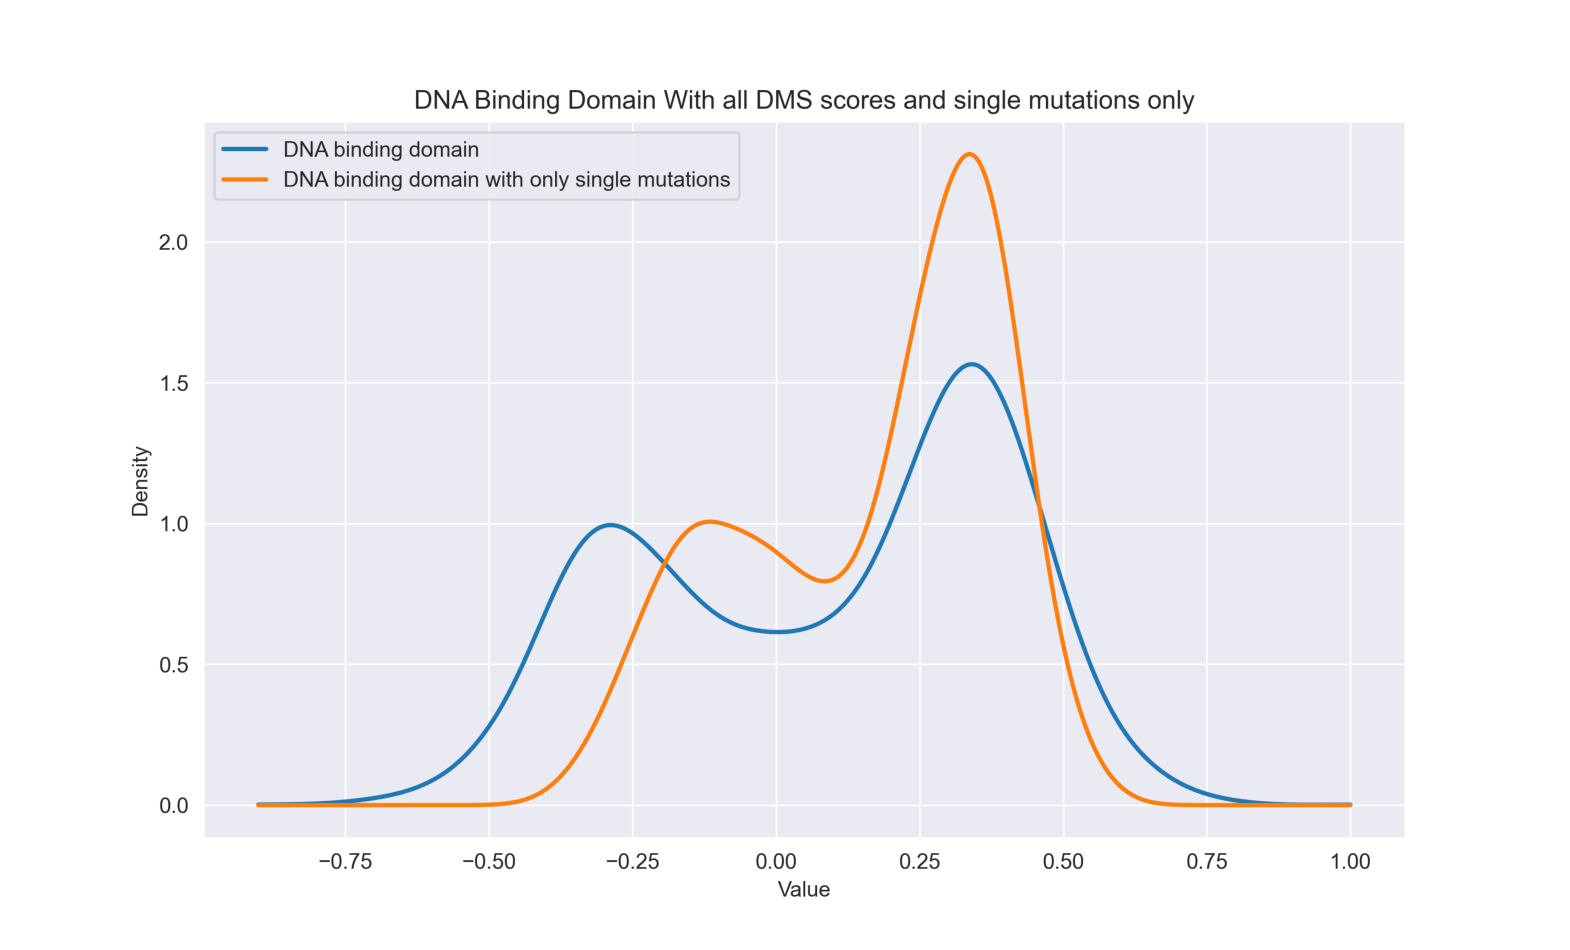

In [36]:
#Comparing DNA binding domain
all_vs_smu = plt.imread('../domain_comparison/data/all_vs_smu.png')
fig2, ax2 = plt.subplots(figsize=(20, 20))
plt.imshow(all_vs_smu)
plt.axis('off')
plt.show()

## Calculating severity scores
#### Matching DMS_scores with the mutation probability (only for single mutations)


In [41]:
p53_codons = ses.p53_codons_gia
smu_dms = ses.dms_smut(p53_codons, gia_null_eto, bias_dms=False)
smu_dms.head(15)

aa_new,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
position_mut,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.445662,0.339590,-0.896484,NaN,NaN,NaN,NaN,-0.479409,NaN,0.143952,-0.236035,NaN,NaN
1,0.010515,NaN,0.461640,NaN,NaN,-0.194648,NaN,NaN,0.530006,NaN,NaN,NaN,NaN,0.320817,NaN,NaN,NaN,0.291224,NaN,NaN
2,0.096724,NaN,0.478411,NaN,NaN,-0.233738,NaN,NaN,0.515066,NaN,NaN,NaN,NaN,0.350823,NaN,NaN,NaN,-0.029022,NaN,NaN
3,-0.336677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.298945,NaN,NaN,NaN,0.507619,0.398395,0.358706,0.470961,NaN,NaN,NaN
4,NaN,NaN,NaN,0.050641,NaN,NaN,0.301647,NaN,0.628535,0.406995,NaN,NaN,0.142345,NaN,0.175909,NaN,NaN,NaN,NaN,NaN
5,-0.144568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.162452,NaN,NaN,0.287179,NaN,NaN,NaN,0.460968,NaN,NaN,NaN
6,0.424830,NaN,NaN,0.163584,NaN,0.291564,0.319816,NaN,NaN,NaN,NaN,0.290093,NaN,NaN,NaN,NaN,NaN,0.272293,NaN,0.322615
7,0.198871,NaN,NaN,NaN,NaN,NaN,0.261306,NaN,NaN,0.116638,NaN,NaN,NaN,NaN,0.444965,-0.357201,0.458936,NaN,NaN,NaN
8,NaN,0.063818,NaN,NaN,NaN,0.335782,NaN,0.300680,NaN,NaN,NaN,0.424352,NaN,NaN,0.382832,NaN,0.265314,NaN,NaN,NaN


<Axes: xlabel='aa_new', ylabel='position_mut'>

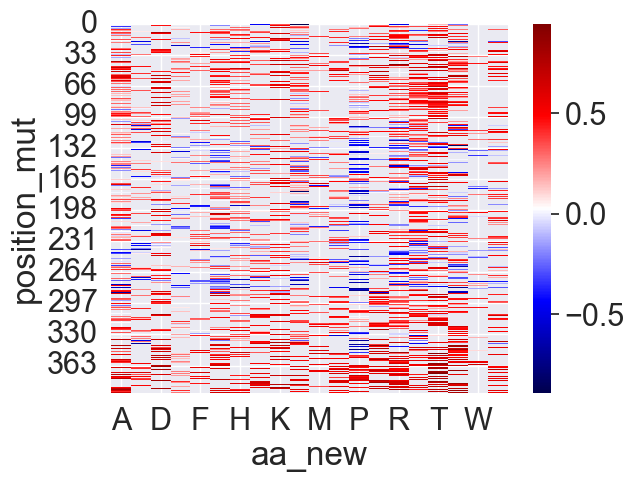

In [42]:
sns.heatmap(smu_dms, cmap='seismic', )

<Axes: xlabel='aa_new', ylabel='position_mut'>

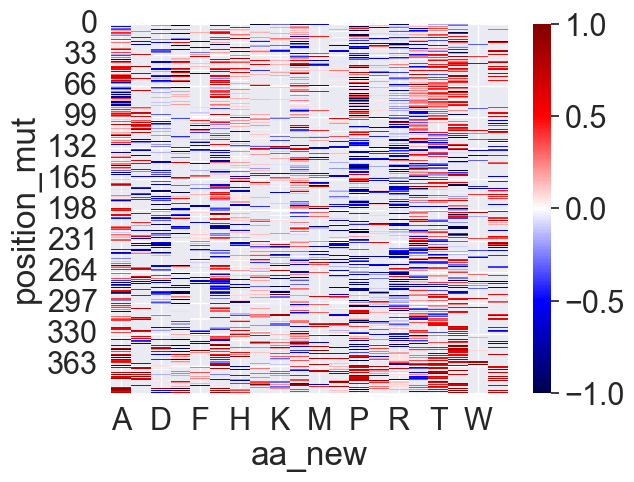

In [45]:
severity_scores = ses.dms_smut(p53_codons, gia_null_eto, bias_dms=True, include_original=True)
sns.heatmap(severity_scores, cmap='seismic', robust=False)